## Домашнее задание номер 3:

Коллеги подготовили для вас домашнее задание на классификацию. В рамках задания вам предлагается решить задачу и сразиться между собой в качестве. Задача на предсказание: согласится ли клиент на депозит. Найти задание можно по ссылке (для участия нужна регистрация на kaggle.com)
Нужно решить задачу с помощью 3х методов:
1. кнн
2. дерева принятия решения
3. логистической регрессии

и залить, на ваш взгляд, лучшее решение.

Это командное ДЗ, его нужно выполнить совместно с вашими коллегами. Коммит делается от одного выбранного участника. Для зачета нужно:
1. предоставить ноутбук с кодом, где вы попробовали все 3 метода
2. залить предсказания для теста и найти себя в лидерборде (скоро там появится бейзлайн - минимальное решение, которое нужно побить по качеству, чтобы получить зачет)

Команда, занявшая 1 место, получит дополнительный балл. Метрика качества ROC-AUC.

**Порядок сдачи**

Вовремя сделайте коммит на Kaggle, чтобы попасть в лидерборд. Не забудьте внутри ноутбука указать номер и состав команды.

## file description

* _id - идентификатор человека
* age - возраст
* job - тип работы ("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
* marital - семейное положение ("divorced" (разведенный и овдовевший),"married","single","unknown")
* education - уровень образования ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
* default - есть ли дефолт по кредиту ("no","yes","unknown")
* housing - есть ли кредит на жилье ("no","yes","unknown")
* loan - есть ли персональный кредит ("no","yes","unknown")
* contact - контактный тип связи ("cellular","telephone")
* month - последний контактный месяц года ("jan", "feb", "mar", ..., "nov", "dec")
* day_of_week - последний контактный день недели ("mon","tue","wed","thu","fri")
* duration - длительность последнего контакта в секундах. (Важное замечание: этот атрибут сильно влияет на таргет (например, если длительность - 0 сек., то таргет - 0). Тем не менее, продолжительность не известна до выполнения вызова.
* campaign - количество контактов, выполненных для этого клиента в рамках текущей маркетинговой кампании (включая последний контакт)
* pdays - количество дней прошедших последнего контакта с клиентом с предыдущей маркетинговой кампании (999 означает, что ранее с клиентом не контактировали)
* previous - количество контактов, выполненных до текущей маркетинговой кампании для этого клиента
* poutcome - результат предыдущей маркетинговой кампании ("failure","nonexistent","success")

### ниже приведены показатели окружающей среды и банка
* emp.var.rate - изменение уровня занятости (квартальный показатель)
* cons.price.idx - индекс потребительских цен (ежемесячный показатель)
* cons.conf.idx - индекс доверия потребителя (ежемесячный показатель)
* euribor3m - курс Euribor (ежедневный показатель)
* nr.employed - количество сотрудников (квартальный показатель)
* target - целевая переменная (таргет) - согласился ли клиент на вклад (депозит)




In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pydot
from IPython.display import Image

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

from ipywidgets import interact, IntSlider, FloatSlider

In [486]:
# read training file
train = pd.read_csv('train.csv', sep=',')

### Что за данные в файле:

In [487]:
train.shape

(24712, 22)

In [488]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
_id,24712,24712,31bd7c52afcf04d0f6657ebc83b079b8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,24712,NaN,NaN,NaN,40.0302,10.4623,17,32,38,47,98
job,24712,12,admin.,6254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,24712,4,married,14871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,24712,8,university.degree,7309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,24712,3,no,19567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,24712,3,yes,12934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,24712,3,no,20334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,24712,2,cellular,15729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,24712,10,may,8199,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [489]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

### Преобразуем нужные текcтовые колонки в числовые и произведем прочие чистки данных

In [490]:
#for i in train.columns: # перебираем все столбцы
#    if str(train[i].dtype) == 'object' and i == "education" : # если тип столбца - object
#        print('='*10)
#        print(i) # выводим название столбца
#        print(set(train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
#        print('\n') # выводим пустую строку
        

# contact {'cellular', 'telephone'}
def ret_contact(p_in):
    ret = \
    p_in.replace('', 0)\
    .replace('cellular', 1)\
    .replace('telephone', 2)
    return ret

# job - тип работы 
## Присвоим с шагом наименьшие значения - безработным, домохозяйкам и непонятно кому, далее студентам, далее ...
#"admin.","blue-collar","entrepreneur","housemaid","management",
#"retired","self-employed","services","student","technician","unemployed","unknown"
def ret_job(p_in):
    ret = \
    p_in.replace('', 0)\
    .replace('admin.', 21)\
    .replace('blue-collar', 30)\
    .replace('entrepreneur', 40)\
    .replace('housemaid', 13)\
    .replace('management', 41)\
    .replace('retired', 11)\
    .replace('self-employed', 7)\
    .replace('services', 22)\
    .replace('student', 12)\
    .replace('technician', 31)\
    .replace('unemployed', 2)\
    .replace('unknown', 1)
    return ret

# month "jan", "feb", "mar", ..., "nov", "dec"
def ret_month(p_in):
    ret = \
    p_in.replace('', 0)\
    .replace('jan', 1)\
    .replace('feb', 2)\
    .replace('mar', 3)\
    .replace('apr', 4)\
    .replace('may', 5)\
    .replace('jun', 6)\
    .replace('jul', 7)\
    .replace('aug', 8)\
    .replace('sep', 9)\
    .replace('oct', 10)\
    .replace('nov', 11)\
    .replace('dec', 12)
    return ret

# marital семейное положение ("divorced" (разведенный и овдовевший),"married","single","unknown")
def ret_marital(p_in):
    ret = \
    p_in.replace('', 0)\
    .replace('divorced', 1)\
    .replace('married', 2)\
    .replace('single', 3)\
    .replace('unknown', 4)
    return ret

# edication "basic.4y","basic.6y","basic.9y","high.school","illiterate",
#"professional.course","university.degree","unknown"
# разбросаем значения по шкале
def ret_education(p_in):
    ret = \
    p_in.replace('', 0)\
    .replace('basic.4y', 10)\
    .replace('basic.6y', 12)\
    .replace('basic.9y', 15)\
    .replace('high.school', 25)\
    .replace('illiterate', 30)\
    .replace('professional.course', 35)\
    .replace('university.degree', 45)\
    .replace('unknown', 1)
    return ret


# default - есть ли дефолт по кредиту ("no","yes","unknown")
# housing - есть ли кредит на жилье ("no","yes","unknown")
# loan - есть ли персональный кредит ("no","yes","unknown")
def ret_ynu(p_in):
    ret = \
    p_in.replace('', 0)\
    .replace('no', 40)\
    .replace('yes', 50)\
    .replace('unknown', 0)
    return ret


# poutcome 
def ret_poutcome(p_in):
    ret = \
    p_in.replace('', 0)\
    .replace('success', 100)\
    .replace('failure', 1)\
    .replace('nonexistent', 20)
    return ret


### Функция запускает чистку данных

In [549]:
columnsTitles = ['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'is_0',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'target']


def is_duration_0(df, column):
    return df[column].map(lambda x: 1 if x == 0 else 0)
    
def preproc_data(df_input):
    #df_output = df_input.copy()
    ## Your Code Here
    
    df_output = (df_input.copy()
                 # Удаляло идентификатор `AGREEMENT_RK`
                .drop('_id', axis=1)      
                 # Кодировала категориальные признаки
                .assign(education = lambda x: x["education"].astype('category').cat.codes,
                        marital = lambda x: x["marital"].astype('category').cat.codes,
                        job = lambda x: x["job"].astype('category').cat.codes,
                        default = lambda x: x["default"].astype('category').cat.codes,
                        housing = lambda x: x["housing"].astype('category').cat.codes,
                        loan = lambda x: x["loan"].astype('category').cat.codes,
                        contact = lambda x: x["contact"].astype('category').cat.codes,
                        month = lambda x: x["month"].astype('category').cat.codes,
                        day_of_week = lambda x: x["day_of_week"].astype('category').cat.codes,
                        poutcome = lambda x: x["poutcome"].astype('category').cat.codes,
                        is_0 = is_duration_0(df_input, "duration")
                       )
    )        
    return df_output.reindex(columns=columnsTitles)

In [550]:
## Почистим и преобразуем тренировочные данные в новую переменную train_preproc, посмотрим что получилось
train_preproc = train.pipe(preproc_data)
train_preproc.info()
train_preproc.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
age               24712 non-null int64
job               24712 non-null int8
marital           24712 non-null int8
education         24712 non-null int8
default           24712 non-null int8
housing           24712 non-null int8
loan              24712 non-null int8
contact           24712 non-null int8
month             24712 non-null int8
day_of_week       24712 non-null int8
duration          24712 non-null int64
is_0              24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null int8
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: float64(5), int64(7), int

,count,mean,std,min,25%,50%,75%,max
age,24712.0,40.030188,10.462301,17.000,32.000,38.000,47.000,98.000
job,24712.0,3.705851,3.587728,0.000,0.000,2.000,7.000,11.000
marital,24712.0,1.177080,0.610203,0.000,1.000,1.000,2.000,3.000
education,24712.0,3.747248,2.140934,0.000,2.000,3.000,6.000,7.000
default,24712.0,0.208239,0.406156,0.000,0.000,0.000,0.000,2.000
housing,24712.0,1.071949,0.984730,0.000,0.000,2.000,2.000,2.000
loan,24712.0,0.329152,0.724440,0.000,0.000,0.000,0.000,2.000
contact,24712.0,0.363508,0.481019,0.000,0.000,0.000,1.000,1.000
month,24712.0,4.219529,2.317693,0.000,3.000,4.000,6.000,9.000
day_of_week,24712.0,2.008134,1.402452,0.000,1.000,2.000,3.000,4.000


In [551]:
train_preproc.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,54,9,1,5,1,0,0,0,1,3,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,36,7,2,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,53,1,1,0,0,2,0,0,1,1,...,1,999,0,1,1.4,93.444,-36.1,4.965,5228.1,0
3,34,1,1,2,0,2,2,1,6,4,...,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,29,7,2,6,0,2,0,1,1,0,...,1,999,0,1,-1.7,94.027,-38.3,0.890,4991.6,0


In [494]:
# to be continued...

## X - param values, y - target

In [552]:
X = train_preproc.iloc[:, :-1].values
y = train_preproc.iloc[:, -1].values
print(X.shape)
print(y.shape)
print(X[0])

(24712, 21)
(24712,)
[  5.40000000e+01   9.00000000e+00   1.00000000e+00   5.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   3.00000000e+00   8.70000000e+01   0.00000000e+00
   1.00000000e+00   9.99000000e+02   0.00000000e+00   1.00000000e+00
   1.40000000e+00   9.34440000e+01  -3.61000000e+01   4.96300000e+00
   5.22810000e+03]


# Decision Tree

In [553]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from ipywidgets import interact, IntSlider
import subprocess

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

try:
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import StratifiedKFold
    
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import randint as randint
from scipy.stats import uniform

try:
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import GridSearchCV
    from sklearn.cross_validation import RandomizedSearchCV
    from sklearn.cross_validation import StratifiedKFold


RND_SEED = 123


`validation_curve` позволяе исследовать влияние отдельного гиперпараметра модели на ее качество.

Построим валидационные кривые по гиперпараметру глубина дерева (`max_depth`) остальных гиперпараметрах, зафиксированных на значениях по-умолчанию

In [554]:
model = DecisionTreeClassifier(random_state=123)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=132)

train_scores, valid_scores = validation_curve(model, X, y, 
                                              'max_depth', range(1, 10),
                                              cv=cv, scoring='roc_auc')
# это значит, что мы будем проверять влияние параметра max_depth
# в дапозоне от 1 до 10
# и для этого мы будем использовать 5-fold кросс-валидацию
# с мерой качества mean_absolute_error.
# neg_ потому что по умолчанию в sklearn чем значение меры выше - тем лучше, 
# но в нашем случае нам нужно как раз допускать меньшую ошибку

Text(0,0.5,'ROC AUC')

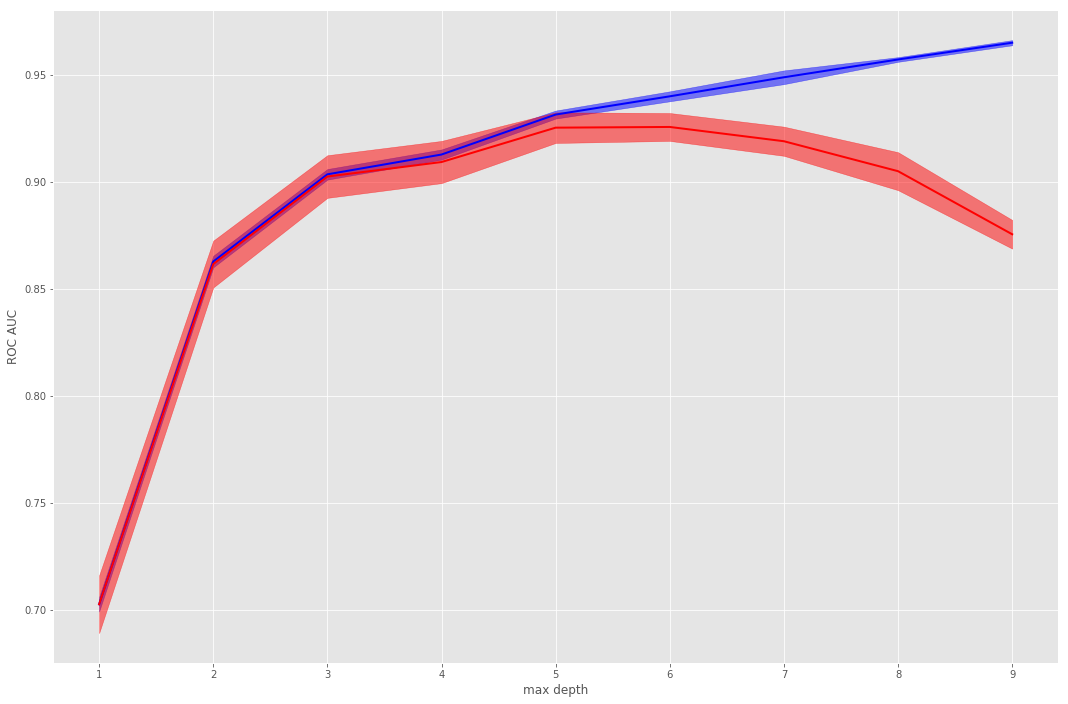

In [555]:
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(range(1,10), train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
plt.fill_between(range(1,10), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1,10), train_score_mean, c='b', lw=2)
plt.plot(range(1,10), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('ROC AUC')

### Подбор гиперпараметров

In [556]:
# Определим пространство поиска

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(2, 8),
    'min_samples_leaf': randint(5, 10),
    'class_weight': [None, 'balanced']}

# Некоторые параметры мы задали не простым перечислением значений, а 
# с помощью распределений.

# Будем делать 200 запусков поиска
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

model = DecisionTreeClassifier(random_state=123)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=300, n_jobs=-1,
                                   cv=cv, scoring='roc_auc', random_state=123)
# А дальше, просто .fit()
random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
          fit_params=None, iid=True, n_iter=300, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018367476208>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000183096287F0>, 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [557]:
random_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 7}

In [558]:
random_search.best_score_

0.93541399200580844

In [559]:
# Все прогоны. 
p = random_search.grid_scores_[0]
print(p)

mean: 0.92254, std: 0.00501, params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 9}


G:\Python\Anaconda3\envs\SapML\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


### Важность признаков

Возьмем лучшую модель и выведем важность признаков

Каждое число соответствует важности признака, который подавался на вход

In [568]:
model = random_search.best_estimator_
for i in range(0,21):
    print(i, train_preproc.columns[i], model.feature_importances_[i])

0 age 0.000270525673454
1 job 0.0
2 marital 0.000244740147055
3 education 0.00162866451235
4 default 0.00406855535182
5 housing 0.0
6 loan 0.0
7 contact 0.002091183202
8 month 0.0209780157214
9 day_of_week 0.00282229871539
10 duration 0.511279600094
11 is_0 0.0
12 campaign 0.00122852617431
13 pdays 0.00822044045642
14 previous 0.00189791393465
15 poutcome 0.00195004781344
16 emp.var.rate 0.0502777105282
17 cons.price.idx 0.00435144544378
18 cons.conf.idx 0.084394377172
19 euribor3m 0.0318507526424
20 nr.employed 0.272445202418


In [569]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("model") 

'model.pdf'

## Применим на тестовой выборке

### прогоним тестовые данные через очистку, сохраним отдельно столбец ID - он нужен для итога

In [570]:
# read training file
test = pd.read_csv('test.csv', sep=',')

In [571]:
test_IDs = test['_id']

In [572]:
test.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,...,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,...,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


In [573]:
## Почистим и преобразуем тестовые данные в новую переменную test_preproc, посмотрим что получилось
test_preproc = test.pipe(preproc_data)

## X_test - param values, y_test- target

In [581]:
X_test = test_preproc.iloc[:, :-1].values
y_test = np.zeros((X_test.shape[0],), dtype=np.int_)
print(X_test.shape)
print(y_test.shape)

(16476, 21)
(16476,)


In [582]:
test_preproc

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,57,9,1,3,0,0,2,0,6,1,...,1,999,1,0,-1.8,92.893,-46.2,1.299,5099.1,NaN
1,55,11,1,7,1,2,0,1,6,2,...,2,999,0,1,1.1,93.994,-36.4,4.860,5191.0,NaN
2,33,1,1,2,0,0,0,0,6,0,...,1,999,1,0,-1.8,92.893,-46.2,1.313,5099.1,NaN
3,36,0,1,3,0,0,0,1,4,0,...,4,999,0,1,1.4,94.465,-41.8,4.967,5228.1,NaN
4,27,3,1,3,0,2,0,0,3,0,...,2,999,0,1,1.4,93.918,-42.7,4.963,5228.1,NaN
5,58,5,1,5,0,2,2,0,3,0,...,1,999,0,1,1.4,93.918,-42.7,4.962,5228.1,NaN
6,48,7,1,3,1,2,0,1,6,4,...,1,999,0,1,1.1,93.994,-36.4,4.856,5191.0,NaN
7,51,0,0,6,1,2,0,0,1,2,...,7,999,0,1,1.4,93.444,-36.1,4.962,5228.1,NaN
8,24,2,1,6,0,2,2,1,4,4,...,4,999,0,1,1.4,94.465,-41.8,4.962,5228.1,NaN
9,36,9,0,5,0,2,2,0,3,1,...,4,999,0,1,1.4,93.918,-42.7,4.962,5228.1,NaN


In [583]:
y_test = model.predict(X_test)

In [584]:
result_of_tree = pd.DataFrame()
result_of_tree['_id'] = test_IDs
result_of_tree['target'] = y_test

## Результат работы Дерева Решений запихнем в файл требуемого формата

In [585]:
result_of_tree.to_csv('result_of_tree.csv', index=False)

In [586]:
# для проверки добавим столбец таргет к тестовой выборке и посмотрим в каких строках 1
result_of_tree_full = test.copy()
result_of_tree_full['target'] = y_test
result_of_tree_full.to_csv('result_of_tree_full.csv', index=True, sep=';')

In [587]:
Y_test_LR_proba = model.predict_proba(X_test)

In [588]:
Y_test_LR_proba[:,1]

array([ 0.28467098,  0.00630426,  0.02599813, ...,  0.        ,
        0.        ,  0.        ])

In [589]:
result_of_tree_proba = pd.DataFrame()
result_of_tree_proba['_id'] = test_IDs
result_of_tree_proba['target'] = Y_test_LR_proba[:,1]

In [590]:
result_of_tree_proba.to_csv('result_of_tree_proba.csv', index=False)

In [591]:
# для проверки добавим столбец таргет к тестовой выборке и посмотрим в каких строках 1
result_of_tree_full_proba = test.copy()
result_of_tree_full_proba['target'] = Y_test_LR_proba[:,1]
result_of_tree_full_proba.to_csv('result_of_tree_full_proba.csv', index=True, sep=';')

In [592]:
result_of_tree_proba['target'] = list(map(lambda x: x[1], Y_test_LR_proba))

In [593]:
result_of_tree_proba

,_id,target
0,66810d8e6bf2b41c880a7bc6c8a1e295,0.284671
1,ccac3879652b08cb8b44c1920fd93afa,0.006304
2,fcccab4d7a76f70647f015f2c84c2af8,0.025998
3,ed8399278c30678dab739045fa12b440,0.054304
4,1d4d62ac5cabcb48bac7112813f290cb,0.025975
5,aba2dec4c5cab88824f36babd24b986f,0.781649
6,06f318f1dd178e738f675bb88a5adb84,0.006304
7,d5036f5956e42ee6207296238fc4bc1d,0.000000
8,fe0cc8933698ad4046ff2b82f65756eb,0.000000
9,70190122f4ebf196535e11b33eb95b81,0.000000


# Ближайшие соседи KNN

In [596]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold

model_KNN = KNeighborsClassifier()
model_KNN.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [597]:
cv = StratifiedKFold(n_splits=5)

param_grid = {    
    'metric': ['minkowski','euclidean','manhattan'],
    'weights': ['uniform','distance'],
    'n_neighbors': list(range(2, 10)),
}

grid_search_KNN = GridSearchCV(model_KNN, param_grid=param_grid, cv=cv, scoring='roc_auc', refit=True, n_jobs=-1, verbose=10)

grid_search_KNN.fit(X, y)           
           

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  1.5min
[Paralle

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'], 'weights': ['uniform', 'distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [598]:
'''
Посчитанный результат vs Test 
1) 0.6982194469464216;  0.   
'''

print(grid_search_KNN.best_score_)
print(grid_search_KNN.best_params_)

0.906518612623
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [600]:
# подобранные варианты: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}

model_KNN2 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 2, weights = 'distance')
model_KNN2.fit(X,y)

Y_test_KNN = model_KNN2.predict(X_test)
Y_test_KNN_proba = model_KNN2.predict_proba(X_test)

In [603]:
result_KNN = test.loc[:,('_id',)]
result_KNN['target'] = Y_test_KNN
result_KNN.to_csv('result_KNN.csv', index=False)

##  LogisticRegression

In [604]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold

model_LR = LogisticRegression(random_state=42)
model_LR.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [605]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

core_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'class_weight': [None, 'balanced']
}

param_grid = [
  {'C': core_grid['C'],
  'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
  'class_weight': core_grid['class_weight'],
  'penalty': ['l2']},

  {'C': core_grid['C'],
  'solver' : ['liblinear', 'saga'],
  'class_weight': core_grid['class_weight'],
  'penalty': ['l1']}
   #'multi_class': ['ovr', 'multinomial'],
   #'fit_intercept': [True, False],
   #'dual': [True, False],    
]   

grid_search_LR = GridSearchCV(model_LR, param_grid=param_grid, cv=cv, scoring='roc_auc', refit=True, n_jobs=-1, verbose=10)

grid_search_LR.fit(X, y)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  1.6min
[Paralle

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'class_weight': [None, 'balanced'], 'penalty': ['l2']}, {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear', 'saga'], 'class_weight': [None, 'balanced'], 'penalty': ['l1']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [606]:
'''
Посчитанный результат vs Test 
1) 0.9352721609874993;  0.86648   

'''
print(grid_search_LR.best_score_)
print(grid_search_LR.best_params_)

0.930992754871
{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}


In [608]:
# подобранные варианты: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

model_LR2 = LogisticRegression(random_state=42, C= 1, class_weight='balanced', penalty= 'l1', solver= 'liblinear')
model_LR2.fit(X,y)

Y_test_LR = model_LR2.predict(X_test)
Y_test_LR_proba = model_LR2.predict_proba(X_test)

#print('LogisticRegression', roc_auc_score(y_test, Y_test_LR_proba[:,1]))

In [610]:
result_LR = test.loc[:,('_id',)]
result_LR['target'] = Y_test_LR
result_LR.to_csv('result_LR.csv', index=False)